In [58]:
import netket as nk
import json
from qutip import *
import numpy as np
import time
import multiprocessing as mp
from collections import OrderedDict
from pickle import dump
import os
import matplotlib.pyplot as plt
import scipy
#from matplotlib import gridspec
from functools import reduce
from functools import wraps
#plt.style.use('seaborn')
from scipy.stats import norm
import matplotlib
matplotlib.rcParams["figure.dpi"] = 200
plt.rcParams['text.usetex'] = True

In [59]:
data = []
Eng = []
Iter = []
with open('2022_winter_analysis/2022_winter_data_0328/excited_Logs_N6_i1_j41.log', 'r') as f:
    for line in f:
        data.append(line)
#use string tricks to convert everything to numbers
data = data[0].replace('[','!').replace(']','!').split('!')
Iter = list(map(int, data[1].split(',')))
Eng = list(map(float, data[3].split(',')))


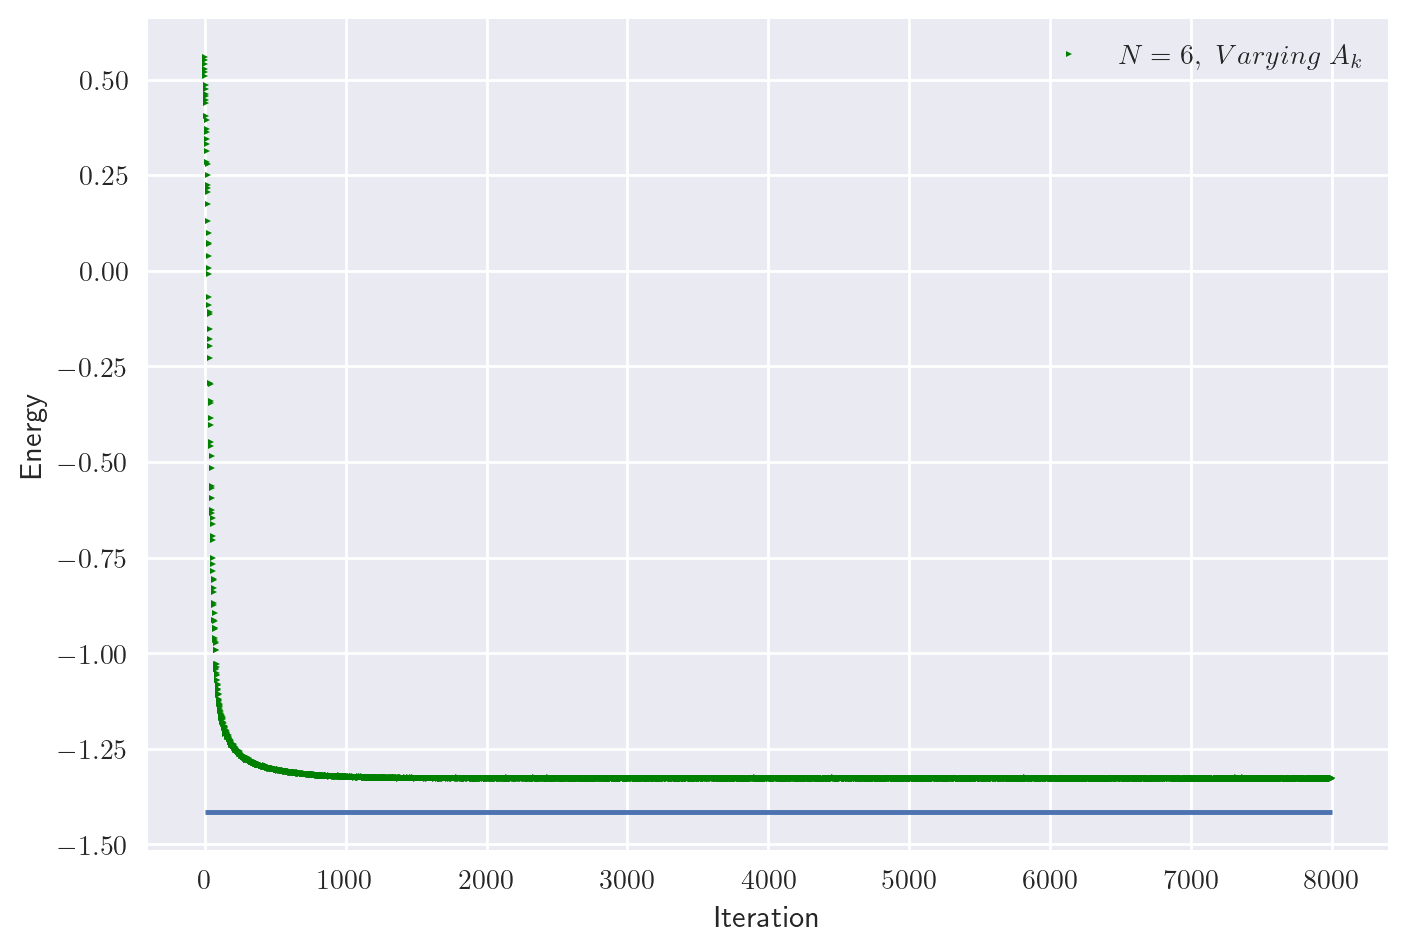

In [60]:
#finally, plot them, in log-scale
#plt.yscale("symlog")
plt.plot(Iter,Eng,'g>',markersize=2,label=r'$N=6,\ Varying \ A_k$')
plt.hlines(-1.41524943  ,0,Iter[-1])
#plt.hlines(-1.41339,0,Iter[-1], color='green')
plt.ylabel('Energy')
plt.xlabel('Iteration')
#plt.ylim(-1.417,-1.412)
#plt.ylim(-1.87,-1.75)
#plt.ylim(-1.225,-1.2175)
#plt.xlim(9500, 10000)
plt.legend()
plt.show()

In [18]:
a=  np.std(Eng[4500:5000],ddof=1)
print(a)

0.001006153830303419


In [12]:
print(np.abs(-1.19876478-a))

nan


In [19]:
#check standard error and standard deviation of the mean

se = list(map(float, data[9].replace(',null','').split(',')))
print('mean standard error of the last 500 iteratios is '+str(np.mean(se[4500:5000])))
print('standard deviation of the last 500 local energy values is '+str(np.std(Eng[9500:10000], ddof=1)))

mean standard error of the last 500 iteratios is 0.0005291356374521901
standard deviation of the last 500 local energy values is nan


In [13]:
se_list = []
std_list = []
se_std_list=[]
for i in range(12):
    i = 500*i
    se_list.append(np.mean(se[i+4000:i+4500]))
    std_list.append(np.std(Eng[i+4000:i+4500], ddof=1))
    se_std_list.append(np.std(se[i+4000:i+4500]))

print(se_std_list)

[0.0008941706558281485, 0.0008474188333327185, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]


/home/victor/.local/lib/python3.8/site-packages/numpy/core/_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/victor/.local/lib/python3.8/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/victor/.local/lib/python3.8/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


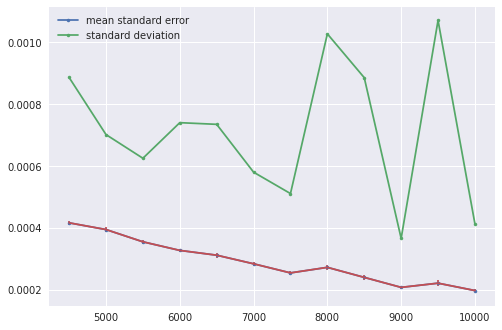

In [43]:
step = np.linspace(4500, 10000,12)
plt.plot(step, se_list, label='mean standard error', marker='.')
plt.plot(step, std_list, label= 'standard deviation', marker='.')
plt.errorbar(step, se_list, yerr = se_std_list/np.sqrt(500))
plt.legend()
plt.show()

Text(0.5, 0, 'Iteration')

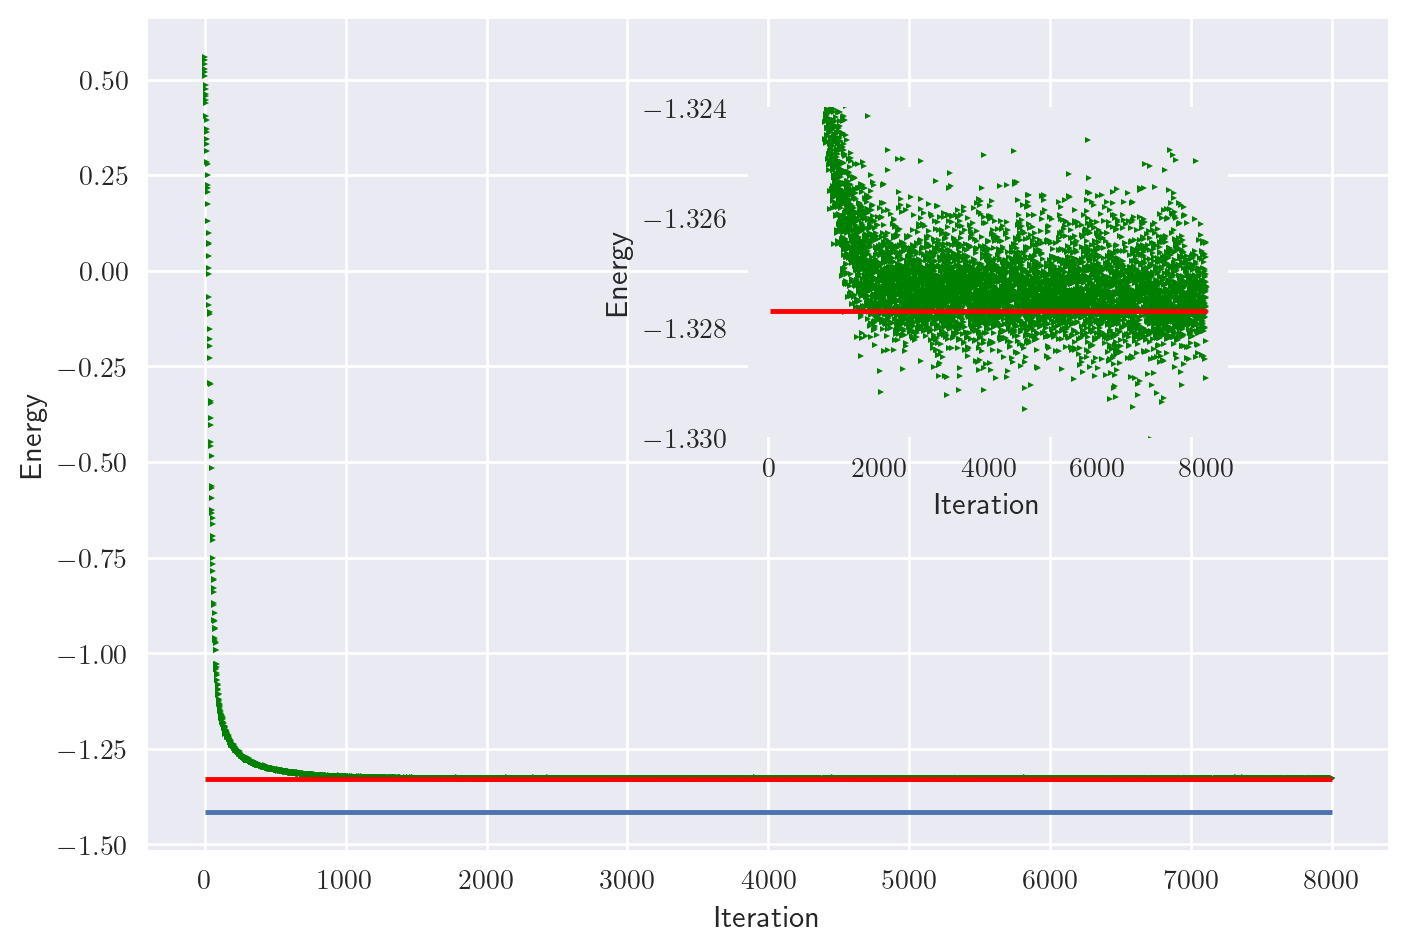

In [67]:
# doing the embedded figure

# plot
ax1 = plt.axes() # standard axes
ax2 = plt.axes([0.5, 0.5, 0.3, 0.3])
ax1.plot(Iter,Eng,'g>',markersize=2,label=r'$N=6,\ Varying \ A_k$')
ax1.hlines(-1.32771232 ,0,Iter[-1], color='red')
ax1.hlines(-1.41524943  ,0,Iter[-1])
ax1.tick_params(labelsize = 10)
ax1.set_ylabel('Energy')
ax1.set_xlabel('Iteration')

ax2.plot(Iter,Eng,'g>',markersize=2,label=r'$N=6,\ Varying \ A_k$')
ax2.set_ylim(-1.33,-1.324)
ax2.grid(False)
ax2.tick_params(labelsize = 10)
ax2.hlines(-1.41524943  ,0,Iter[-1])
ax2.hlines(-1.32771232 ,0,Iter[-1], color='red')
ax2.set_ylabel('Energy')
ax2.set_xlabel('Iteration')
